In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astropy.visualization import ImageNormalize, SqrtStretch
from astropy.io import fits

import sunpy.coordinates  # NOQA
import sunpy.map
from sunpy.net import Fido
from sunpy.net import attrs as a
from functions_AIA import *

import torch

#for visualisation
import ipympl

Export request pending. [id=JSOC_20231119_1138, status=2]
Waiting for 0 seconds...
Export request pending. [id=JSOC_20231119_1138, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231119_1138, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231119_1138, status=1]
Waiting for 5 seconds...
1 URLs found for download. Full request totalling 1MB


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia.lev1_euv_12s.2012-12-16T174837Z.304.image.fits:   0%|          | 0.00/173k [00:00<?, ?B/s]

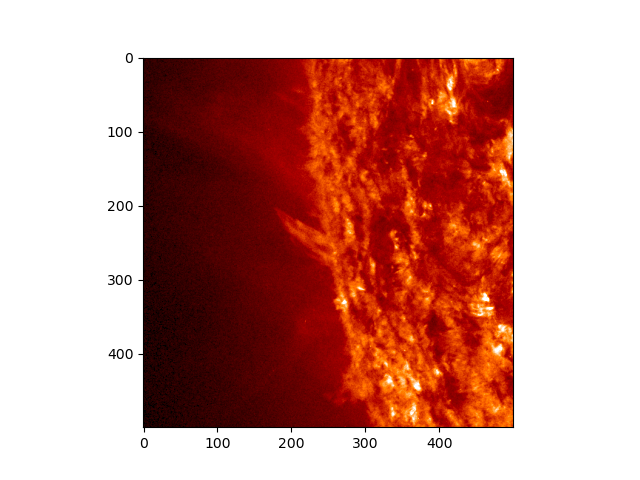

In [3]:
data=load_data()
files=get_image(data[data.index==222], num_image=1) #first line of the data
image_array=array_file(files)
plot_array(image_array)

    

In [ ]:
np.max(image_array)

1571.0

[[ 70  71  84 ...  93 103 106]
 [ 64  75  88 ...  90 115 102]
 [ 62  90  98 ...  86  82  88]
 ...
 [ 66  72  89 ... 328 475 445]
 [ 62  87  73 ... 420 873 746]
 [ 73  71  69 ... 483 883 866]]


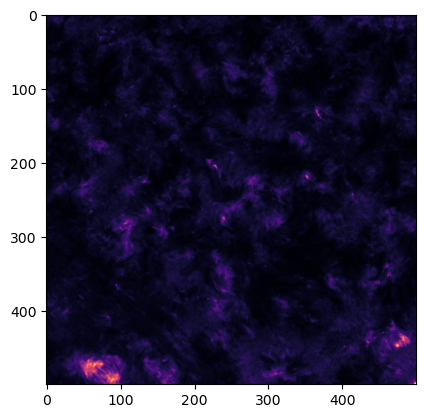

In [ ]:
from astropy.io import fits
with fits.open(file[0]) as f:
    data=f[1].data
    image_array=np.array(data)
    print(image_array)
plt.imshow(image_array, cmap="magma")